In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-2023/house_prices.csv
/kaggle/input/linear-regression-house-price-prediction/Housing.csv


In [2]:
df= pd.read_csv("/kaggle/input/linear-regression-house-price-prediction/Housing.csv")


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()
df["price"].nunique()

219

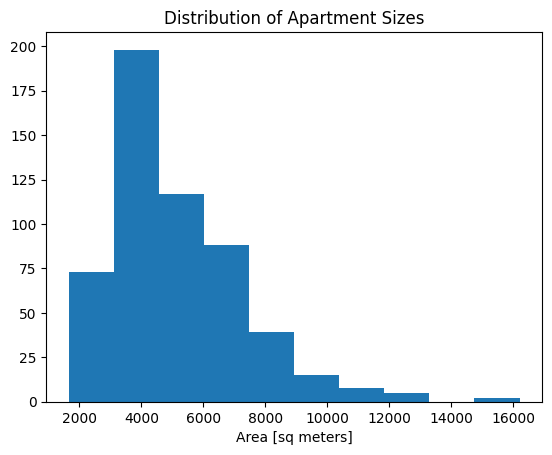

In [6]:
plt.hist(df["area"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [7]:
df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

Text(0.5, 1.0, 'Islamabad: Price vs Area')

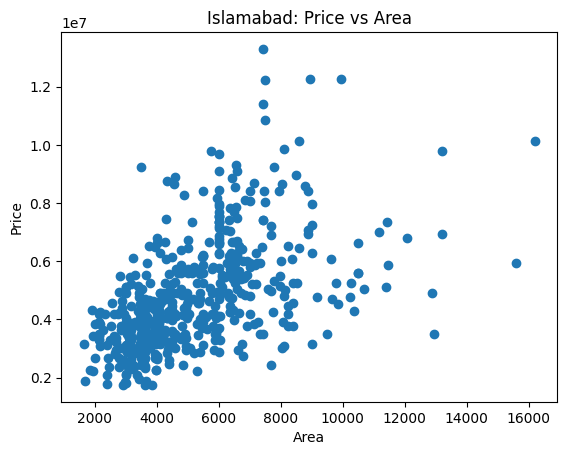

In [8]:
plt.scatter(x=df["area"], y=df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Islamabad: Price vs Area")

In [9]:
#Training data- Feature matrix
features = ["area"]
X_train = df[features]
X_train.count()

area    545
dtype: int64

In [10]:
target = "price"
y_train= df[target]

In [11]:
#baseline
y_mean = y_train.mean()
y_mean

4766729.247706422

In [12]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422]

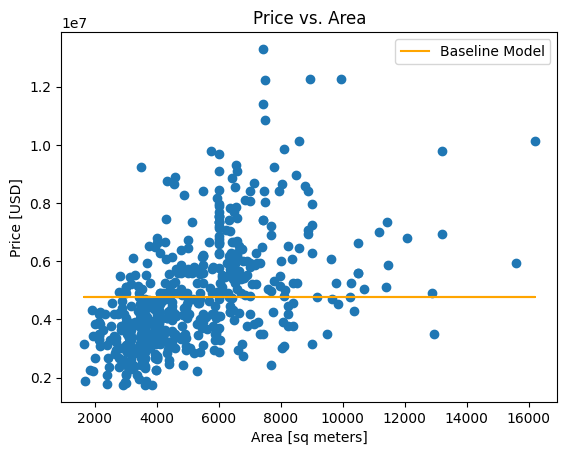

In [13]:
# Add a line to the plot
plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")

plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs. Area")
plt.legend();

In [14]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 4766729.25
Baseline MAE: 1440702.92


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([5815162.19790048, 6526603.53508057, 6988578.42935335,
       5852120.18944231, 5815162.19790048])

In [18]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 1172305.51


In [19]:
_, X_test, _, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [20]:
overlap = pd.merge(X_train, X_test, how="inner")
print("Overlap rows:", overlap.shape[0])


Overlap rows: 563


In [21]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    5.112960e+06
1    5.390145e+06
2    4.253687e+06
3    4.697183e+06
4    4.216729e+06
dtype: float64

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 316 to 155
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [23]:
intercept = round(model.intercept_, round(2))
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 2387308.48


In [24]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 461.97


In [25]:
print(f"apartment_price = {intercept} + {coefficient} * surface_covered") 

apartment_price = 2387308.48 + 461.97 * surface_covered


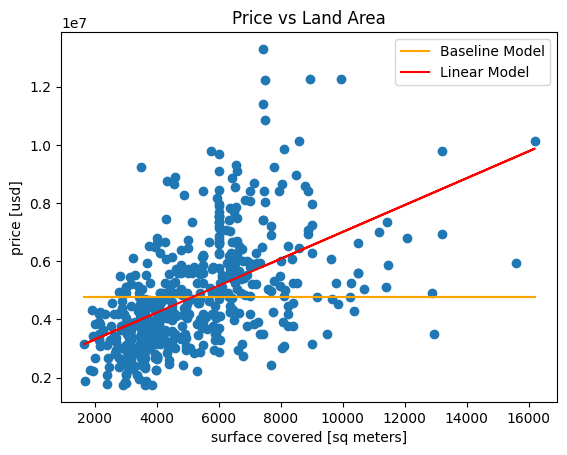

In [26]:
# Add a line to the plot
plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")
plt.plot(X_train, model.predict(X_train), color="red", label="Linear Model")

plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.title("Price vs Land Area")
plt.legend();